In [ ]:
#import os

In [ ]:
from glob import glob


In [ ]:
#label=os.listdir(rootdir)

In [1]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=52c6b4371fa92c486abd95c8b78c2d55dc82117fefa3ac2510326840d148258d
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [2]:
import numpy
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
from sklearn.preprocessing import StandardScaler
#from imbalanced-learn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
files=[]
labels=[]

In [ ]:
#!ls gdrive/MyDrive

ls: cannot access 'gdrive/MyDrive': No such file or directory


In [5]:
#!mkdir '/content/drive/My Drive/Colab Notebooks/dest'
!pip install rarfile
from rarfile import RarFile

In [6]:
with RarFile('/content/drive/MyDrive/Arabicdataset.rar','r') as rarObj:
    rarObj.extractall('/drive/MyDrive/test')

In [ ]:
#!unrar '/content/drive/My Drive/Colab Notebooks/zero2-99.rar'

In [ ]:
#local_download_path = os.path.expanduser('~/zero2-99.rar')

In [7]:
path ='/drive/MyDrive/test/Arabicdataset'

In [ ]:
'''import os
for root, dirs, files in os.walk(path):
  for file in files:
    print(os.path.join(root,file))'''

'import os\nfor root, dirs, files in os.walk(path):\n  for file in files:\n    print(os.path.join(root,file))'

In [ ]:
'''my_str = 'one!two!three'

# ✅ remove everything after FIRST occurrence of character
separator = '!'
result_1 = my_str.split(separator, 1)[0]
print(result_1)  # 👉️ 'one''''

one


In [ ]:
'''a=os.path.join(root,file)
a = a[34:-1]
a'''

'Naam/S19.09.15.wa'

In [8]:
#path ="E:\DNN_Bengali_Numbers\zero2-99"
#we shall store all the file names in this list
separator = '/'
filelist = []
labels=[]
for root, dirs, files in os.walk(path):
    #for dirss in dirs:
        for file in files:
        #append the file name to the list
            filelist.append(os.path.join(root,file))
            string = os.path.join(root,file)
            st =string[34:-1]
            st = st.split(separator,1)[0]
            labels.append(st)
               #print all the file names
#for name in filelist:
#    print(name)

In [9]:
filelist = numpy.array(filelist)
labels = numpy.array(labels)

In [10]:
filelist.shape

(9992,)

In [11]:
def mfcc_features(filelist, labels):
    features = []
    for name in filelist:
            #if wav and wave_name are equal
            #extract mfcc features and append them to features
            #append label to labels
            (rate,sig) = wav.read(name)
            mfcc_feat = mfcc(sig,rate, numcep=18, nfft=2048)

            features.append(mfcc_feat)
    return features, labels


In [12]:
mfcc_feat = mfcc_features(filelist, labels)

In [ ]:
labels

array(['Thamanah', 'Thamanah', 'Thamanah', ..., 'Al-tansheet',
       'Al-tansheet', 'Al-tansheet'], dtype='<U11')

In [13]:
MFCC_features, MFCC_labels = mfcc_feat

In [ ]:
#MFCC_features = numpy.array(MFCC_features)
#labels = numpy.array(labels)

In [14]:
print("shape of extracted mfcc features:", MFCC_features[1].shape)
print("shape of extracted mfcc labels:", MFCC_labels.shape)

shape of extracted mfcc features: (185, 18)
shape of extracted mfcc labels: (9992,)


In [15]:
def zero_pad(features):

    new_spoken_train = []
    max_shape = 0
    for x in features:
        all_shapes = x.shape[0]
        if all_shapes > max_shape:
            max_shape = all_shapes

    for x in features:
        difference = max_shape-x.shape[0]
        zero_padded = numpy.pad(x,((0,difference),(0,0)), "constant")
        new_spoken_train.append(zero_padded)

    new_spoken_train = numpy.array(new_spoken_train)

    return new_spoken_train

In [16]:
new_spoken_train = zero_pad(MFCC_features)

In [17]:
print(new_spoken_train.shape)

(9992, 371, 18)


In [18]:
new_spoken_train = numpy.reshape(new_spoken_train,(new_spoken_train.shape[0],6678))

In [19]:
scaler = StandardScaler()
scaler.fit(new_spoken_train)
new_spoken_train = scaler.fit_transform(new_spoken_train)

In [20]:
ros = SMOTE(random_state=42)
new_mfcc_features,  mfcc_labels = ros.fit_resample(new_spoken_train, MFCC_labels)

dictionary_2 = {}
for i in mfcc_labels:
    dictionary_2[i] = dictionary_2.get(i,0) + 1

print(dictionary_2)

{'Al-hesab': 500, 'Wahed': 500, 'Enha': 500, 'Al-tasdeed': 500, 'Al-tamueel': 500, 'Thlatha': 500, 'Tesah': 500, 'Setah': 500, 'Sabah': 500, 'Khamsah': 500, 'Arbah': 500, 'Naam': 500, 'Al-raseed': 500, 'Safer': 500, 'Al-tahweel': 500, 'Laa': 500, 'Al-tansheet': 500, 'Ethnan': 500, 'Thamanah': 500, 'Al-baynat': 500}


In [21]:
new_mfcc_features = numpy.reshape(new_mfcc_features,(new_mfcc_features.shape[0],371,18))

In [22]:
print(new_mfcc_features.shape)
print(mfcc_labels.shape)

(10000, 371, 18)
(10000,)


In [23]:
new_spoken_train = numpy.reshape(new_mfcc_features,(new_mfcc_features.shape[0],6678))

In [24]:
def one_hot_encoder(labels):
    values = array(labels)
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

    return onehot_encoded

one_hot_encoded_labels = one_hot_encoder(mfcc_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#print(X_train.shape)
#print(X_test.shape)

In [25]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import layers as L
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras import layers as L
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers

input_shape=Input(shape=(371,18,1))
#input_img = Input(shape=(height, width, channel))

'''x = L.Conv2D(64, (2, 2), activation='relu', padding='same', strides=1)(input_shape)
#x = L.MaxPooling2D(2,2)(x)
x = L.Dropout(0.3)(x)
#x = L.Conv2D(10, (5, 1), activation='relu', padding='same')(input_shape)
#x = L.BatchNormalization()(x)
#x = L.Conv2D(5, (5, 1), activation='relu', padding='same')(input_shape)
x = L.BatchNormalization()(x)
x = L.Conv2D(32, (2, 2), activation='relu', padding='same', strides=1)(input_shape)
#x = L.MaxPooling2D(2,2)(x)
x = L.Dropout(0.3)(x)
x = L.BatchNormalization()(x)'''
x = L.Conv2D(16, (2, 2), activation='relu', padding='same', strides=1)(input_shape)
#x = L.MaxPooling2D(2,2)(x)
x = L.Dropout(0.3)(x)
x = L.BatchNormalization()(x)
x = L.Conv2D(8, (2, 2), activation='relu', padding='same', strides=1)(x)
#x = L.MaxPooling2D(2,2)(x)
x = L.Dropout(0.3)(x)
x = L.BatchNormalization()(x)
x = L.Conv2D(1, (2,2), activation='relu', padding='same')(x)
x = L.BatchNormalization()(x)

    # x = Reshape((125, 80)) (x)
    # keras.backend.squeeze(x, axis)
x = L.Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim')(x)

x = L.Bidirectional(L.LSTM(64, return_sequences=True))(
        x)  # [b_s, seq_len, vec_dim]
x = L.Bidirectional(L.LSTM(32))(x)
#xFirst = L.Lambda(lambda q: q[:, -1])(x)  # [b_s, vec_dim]
#query = L.Dense(64)(xFirst)
#attScores = L.Dot(axes=[1, 2])([query, x])
#attScores = L.Softmax(name='attSoftmax')(attScores)  # [b_s, seq_len]

    # rescale sequence
#attVector = L.Dot(axes=[1, 1])([attScores, x])  # [b_s, vec_dim]
#x = L.Flatten()(x)
x = L.Dense(32, activation='relu')(x)
x = L.Dense(16,activation='relu')(x)

#x = L.Dense(64, activation='relu')(x)
#x = L.Dense(32, activation='relu')(x)

output = L.Dense(20, activation='softmax')(x)

model = Model(inputs=[input_shape], outputs=[output])

output = L.Dense(20, activation='softmax')(x)

model = Model(inputs=[input_shape], outputs=[output])

model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 371, 18, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 371, 18, 16)       80        
                                                                 
 dropout (Dropout)           (None, 371, 18, 16)       0         
                                                                 
 batch_normalization (Batch  (None, 371, 18, 16)       64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 371, 18, 8)        520       
                                                                 
 dropout_1 (Dropout)         (None, 371, 18, 8)        0         
                                                           

In [ ]:
#xFirst

In [26]:
one_hot_encoded_labels.shape
#mfcc_labels.shape
#new_spoken_train.shape

(10000, 20)

In [27]:
new_spoken_train = numpy.reshape(new_spoken_train,(new_spoken_train.shape[0],371,18))
new_spoken_train.shape
#one_hot_encoded_labels

(10000, 371, 18)

In [28]:
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(new_spoken_train,
                                                    one_hot_encoded_labels,
                                                    test_size=0.10,
                                                    random_state = 47,
                                                    stratify=one_hot_encoded_labels,shuffle= True)
#random_state = np.random.randint(1,1000, 1)[0]

In [29]:
model.compile(loss= "categorical_crossentropy",
              optimizer= Adam(lr=0.0001),
              metrics=['accuracy'])

In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
import numpy as np
#define the model checkpoint callback -> this will keep on saving the model as a physical file
model_checkpoint = ModelCheckpoint('model_mfcc_26.h5', verbose=1, save_best_only=True)
pat = 10 #this is the number of epochs with no improvment after which the training will stop
#define a function to fit the model
def fit_and_evaluate(t_x, val_x, t_y, val_y, EPOCHS=20, BATCH_SIZE=64):
    early_stopping = EarlyStopping(monitor='val_loss', patience=pat, verbose=1)
    #model = None
    #model = cnn_model(IMAGE_SIZE, 2)
    results = model.fit(t_x, t_y, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping, model_checkpoint],
              verbose=1, validation_split=0.1)
    print("Val Score: ", model.evaluate(val_x, val_y))
    return results

In [31]:
import time, datetime
start = datetime.datetime.now()
n_folds=10
epochs=100
batch_size=64

#save the model history in a list after fitting so that we can plot later
model_history = []

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    t_x, val_x, t_y, val_y = train_test_split(X_train,y_train, test_size=0.10,
                                               random_state = np.random.randint(1,1000, 1)[0],stratify=y_train)
    model_history.append(fit_and_evaluate(t_x, val_x, t_y, val_y, epochs, batch_size))
    print("======="*12, end="\n\n\n")
end = datetime.datetime.now()
diff = (end - start)
diff_seconds = int(diff.total_seconds())
minute_seconds, seconds = divmod(diff_seconds, 60)
hours, minutes = divmod(minute_seconds, 60)
hms = f"{hours}h {minutes}m {seconds}s"
print(hms)

Training on Fold:  1
Epoch 1/100
114/114 [==============================] - ETA: 0s - loss: 2.9029 - accuracy: 0.0850
Epoch 1: val_loss improved from inf to 2.65226, saving model to model_mfcc_26.h5
114/114 [==============================] - 23s 82ms/step - loss: 2.9029 - accuracy: 0.0850 - val_loss: 2.6523 - val_accuracy: 0.1457
Epoch 2/100
  1/114 [..............................] - ETA: 6s - loss: 2.6858 - accuracy: 0.1562

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


114/114 [==============================] - ETA: 0s - loss: 2.4194 - accuracy: 0.1982
Epoch 2: val_loss improved from 2.65226 to 2.18395, saving model to model_mfcc_26.h5
114/114 [==============================] - 8s 69ms/step - loss: 2.4194 - accuracy: 0.1982 - val_loss: 2.1840 - val_accuracy: 0.2716
Epoch 3/100
114/114 [==============================] - ETA: 0s - loss: 1.8878 - accuracy: 0.3306
Epoch 3: val_loss improved from 2.18395 to 1.65185, saving model to model_mfcc_26.h5
114/114 [==============================] - 8s 71ms/step - loss: 1.8878 - accuracy: 0.3306 - val_loss: 1.6518 - val_accuracy: 0.3963
Epoch 4/100
114/114 [==============================] - ETA: 0s - loss: 1.6496 - accuracy: 0.4144
Epoch 4: val_loss improved from 1.65185 to 1.64649, saving model to model_mfcc_26.h5
114/114 [==============================] - 8s 68ms/step - loss: 1.6496 - accuracy: 0.4144 - val_loss: 1.6465 - val_accuracy: 0.3963
Epoch 5/100
114/114 [==============================] - ETA: 0s - loss:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


114/114 [==============================] - ETA: 0s - loss: 0.0588 - accuracy: 0.9848
Epoch 2: val_loss improved from 0.11641 to 0.05335, saving model to model_mfcc_26.h5
114/114 [==============================] - 7s 65ms/step - loss: 0.0588 - accuracy: 0.9848 - val_loss: 0.0534 - val_accuracy: 0.9914
Epoch 3/100
114/114 [==============================] - ETA: 0s - loss: 0.0689 - accuracy: 0.9837
Epoch 3: val_loss did not improve from 0.05335
114/114 [==============================] - 8s 71ms/step - loss: 0.0689 - accuracy: 0.9837 - val_loss: 0.0958 - val_accuracy: 0.9753
Epoch 4/100
114/114 [==============================] - ETA: 0s - loss: 0.0358 - accuracy: 0.9900
Epoch 4: val_loss improved from 0.05335 to 0.04510, saving model to model_mfcc_26.h5
114/114 [==============================] - 8s 66ms/step - loss: 0.0358 - accuracy: 0.9900 - val_loss: 0.0451 - val_accuracy: 0.9901
Epoch 5/100
114/114 [==============================] - ETA: 0s - loss: 0.0292 - accuracy: 0.9920
Epoch 5: va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


114/114 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9973
Epoch 2: val_loss did not improve from 0.02601
114/114 [==============================] - 7s 64ms/step - loss: 0.0122 - accuracy: 0.9973 - val_loss: 0.0265 - val_accuracy: 0.9963
Epoch 3/100
114/114 [==============================] - ETA: 0s - loss: 0.0145 - accuracy: 0.9971
Epoch 3: val_loss improved from 0.02601 to 0.02375, saving model to model_mfcc_26.h5
114/114 [==============================] - 8s 71ms/step - loss: 0.0145 - accuracy: 0.9971 - val_loss: 0.0238 - val_accuracy: 0.9975
Epoch 4/100
114/114 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9957
Epoch 4: val_loss did not improve from 0.02375
114/114 [==============================] - 7s 65ms/step - loss: 0.0134 - accuracy: 0.9957 - val_loss: 0.0299 - val_accuracy: 0.9975
Epoch 5/100
114/114 [==============================] - ETA: 0s - loss: 0.0224 - accuracy: 0.9934
Epoch 5: val_loss did not improve from 0.02375
11

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


114/114 [==============================] - ETA: 0s - loss: 0.0262 - accuracy: 0.9929
Epoch 2: val_loss did not improve from 0.01865
114/114 [==============================] - 8s 68ms/step - loss: 0.0262 - accuracy: 0.9929 - val_loss: 0.0291 - val_accuracy: 0.9914
Epoch 3/100
114/114 [==============================] - ETA: 0s - loss: 0.0333 - accuracy: 0.9919
Epoch 3: val_loss did not improve from 0.01865
114/114 [==============================] - 8s 71ms/step - loss: 0.0333 - accuracy: 0.9919 - val_loss: 0.0212 - val_accuracy: 0.9963
Epoch 4/100
114/114 [==============================] - ETA: 0s - loss: 0.0244 - accuracy: 0.9931
Epoch 4: val_loss did not improve from 0.01865
114/114 [==============================] - 7s 64ms/step - loss: 0.0244 - accuracy: 0.9931 - val_loss: 0.0300 - val_accuracy: 0.9889
Epoch 5/100
114/114 [==============================] - ETA: 0s - loss: 0.0165 - accuracy: 0.9953
Epoch 5: val_loss improved from 0.01865 to 0.00874, saving model to model_mfcc_26.h5
11

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


114/114 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 0.9940
Epoch 2: val_loss did not improve from 0.00652
114/114 [==============================] - 8s 70ms/step - loss: 0.0245 - accuracy: 0.9940 - val_loss: 0.0078 - val_accuracy: 0.9963
Epoch 3/100
114/114 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 0.9949
Epoch 3: val_loss did not improve from 0.00652
114/114 [==============================] - 7s 64ms/step - loss: 0.0182 - accuracy: 0.9949 - val_loss: 0.0168 - val_accuracy: 0.9926
Epoch 4/100
114/114 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 0.9966
Epoch 4: val_loss did not improve from 0.00652
114/114 [==============================] - 8s 71ms/step - loss: 0.0107 - accuracy: 0.9966 - val_loss: 0.0117 - val_accuracy: 0.9951
Epoch 5/100
114/114 [==============================] - ETA: 0s - loss: 0.0248 - accuracy: 0.9942
Epoch 5: val_loss did not improve from 0.00652
114/114 [==============================]

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


114/114 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 0.9992
Epoch 2: val_loss did not improve from 0.00036
114/114 [==============================] - 8s 66ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 3.9394e-04 - val_accuracy: 1.0000
Epoch 3/100
114/114 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 0.9990
Epoch 3: val_loss did not improve from 0.00036
114/114 [==============================] - 8s 70ms/step - loss: 0.0052 - accuracy: 0.9990 - val_loss: 0.0053 - val_accuracy: 0.9975
Epoch 4/100
114/114 [==============================] - ETA: 0s - loss: 0.0078 - accuracy: 0.9985
Epoch 4: val_loss did not improve from 0.00036
114/114 [==============================] - 7s 65ms/step - loss: 0.0078 - accuracy: 0.9985 - val_loss: 7.1049e-04 - val_accuracy: 1.0000
Epoch 5/100
114/114 [==============================] - ETA: 0s - loss: 0.0129 - accuracy: 0.9975
Epoch 5: val_loss did not improve from 0.00036
114/114 [=======================

In [32]:
avg_val_acc = 0
for i in range(10):
    avg_val_acc = avg_val_acc + model_history[i].history['val_accuracy'][-1]
avg_val_acc = avg_val_acc /10
print(avg_val_acc)
#print(model_history[i].history['val_accuracy'][-1]*100)

0.9916049420833588


In [ ]:
for i in range(10):
    print(model_history[i].history['val_accuracy'][-1])

0.9728395342826843
0.9839506149291992
0.9950617551803589
0.9938271641731262
0.9876543283462524
0.9950617551803589
0.9975308775901794
1.0
0.9987654089927673
0.9888888597488403


In [ ]:
for i in range(10):
    print(model_history[i].history['val_loss'][-1])

0.20159517228603363
0.07569171488285065
0.045510243624448776
0.0041167158633470535
0.010003132745623589
0.004177553579211235
0.0011515115620568395
0.0022995483595877886
0.0017869530711323023
0.00027884618612006307


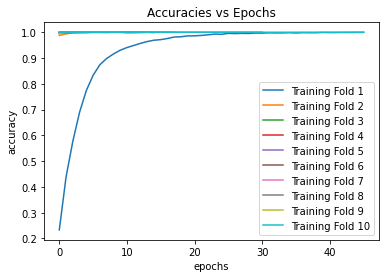

In [ ]:
plt.title('Accuracies vs Epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(model_history[0].history['accuracy'], label='Training Fold 1')
plt.plot(model_history[1].history['accuracy'], label='Training Fold 2')
plt.plot(model_history[2].history['accuracy'], label='Training Fold 3')
plt.plot(model_history[3].history['accuracy'], label='Training Fold 4')
plt.plot(model_history[4].history['accuracy'], label='Training Fold 5')
plt.plot(model_history[5].history['accuracy'], label='Training Fold 6')
plt.plot(model_history[6].history['accuracy'], label='Training Fold 7')
plt.plot(model_history[7].history['accuracy'], label='Training Fold 8')
plt.plot(model_history[8].history['accuracy'], label='Training Fold 9')
plt.plot(model_history[9].history['accuracy'], label='Training Fold 10')
plt.legend()
plt.show()

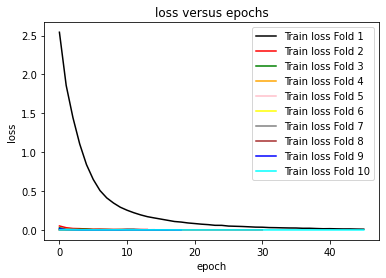

In [ ]:
plt.plot(model_history[0].history['loss'],label='Train loss Fold 1', color='black')
#plt.plot(model_history[0].history['val_loss'],label='Val loss Fold 1', color='black', linestyle = "dashdot")
plt.plot(model_history[1].history['loss'], label='Train loss Fold 2', color='red')
#plt.plot(model_history[1].history['val_loss'],label='Val loss Fold 2', color='red', linestyle = "dashdot")
plt.plot(model_history[2].history['loss'],label='Train loss Fold 3', color='green')
#plt.plot(model_history[2].history['val_loss'],label='Val loss Fold 3', color='green', linestyle = "dashdot")
plt.plot(model_history[3].history['loss'],label='Train loss Fold 4', color='orange')
#plt.plot(model_history[3].history['val_loss'],label='Val loss Fold 4', color='orange', linestyle = "dashdot")
plt.plot(model_history[4].history['loss'],label='Train loss Fold 5', color='pink')
#plt.plot(model_history[4].history['val_loss'],label='Val loss Fold 5', color='pink', linestyle = "dashdot")
plt.plot(model_history[5].history['loss'],label='Train loss Fold 6', color='yellow')
plt.plot(model_history[6].history['loss'],label='Train loss Fold 7', color='gray')
plt.plot(model_history[7].history['loss'],label='Train loss Fold 8', color='brown')
plt.plot(model_history[8].history['loss'],label='Train loss Fold 9', color='blue')
plt.plot(model_history[9].history['loss'],label='Train loss Fold 10', color='cyan')
plt.title('loss versus epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.legend()
plt.show()

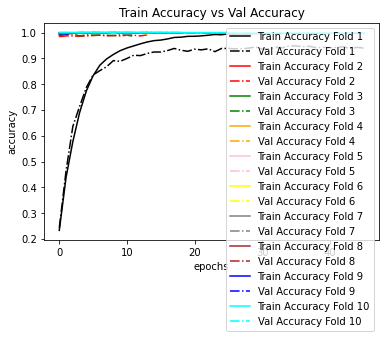

In [ ]:
plt.title('Train Accuracy vs Val Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(model_history[0].history['accuracy'], label='Train Accuracy Fold 1', color='black')
plt.plot(model_history[0].history['val_accuracy'], label='Val Accuracy Fold 1', color='black', linestyle = "dashdot")
plt.plot(model_history[1].history['accuracy'], label='Train Accuracy Fold 2', color='red', )
plt.plot(model_history[1].history['val_accuracy'], label='Val Accuracy Fold 2', color='red', linestyle = "dashdot")
plt.plot(model_history[2].history['accuracy'], label='Train Accuracy Fold 3', color='green', )
plt.plot(model_history[2].history['val_accuracy'], label='Val Accuracy Fold 3', color='green', linestyle = "dashdot")
plt.plot(model_history[3].history['accuracy'], label='Train Accuracy Fold 4', color='orange', )
plt.plot(model_history[3].history['val_accuracy'], label='Val Accuracy Fold 4', color='orange', linestyle = "dashdot")
plt.plot(model_history[4].history['accuracy'], label='Train Accuracy Fold 5', color='pink', )
plt.plot(model_history[4].history['val_accuracy'], label='Val Accuracy Fold 5', color='pink', linestyle = "dashdot")
plt.plot(model_history[5].history['accuracy'], label='Train Accuracy Fold 6', color='yellow', )
plt.plot(model_history[5].history['val_accuracy'], label='Val Accuracy Fold 6', color='yellow', linestyle = "dashdot")
plt.plot(model_history[6].history['accuracy'], label='Train Accuracy Fold 7', color='gray', )
plt.plot(model_history[6].history['val_accuracy'], label='Val Accuracy Fold 7', color='gray', linestyle = "dashdot")
plt.plot(model_history[7].history['accuracy'], label='Train Accuracy Fold 8', color='brown', )
plt.plot(model_history[7].history['val_accuracy'], label='Val Accuracy Fold 8', color='brown', linestyle = "dashdot")
plt.plot(model_history[8].history['accuracy'], label='Train Accuracy Fold 9', color='blue', )
plt.plot(model_history[8].history['val_accuracy'], label='Val Accuracy Fold 9', color='blue', linestyle = "dashdot")
plt.plot(model_history[9].history['accuracy'], label='Train Accuracy Fold 10', color='cyan', )
plt.plot(model_history[9].history['val_accuracy'], label='Val Accuracy Fold 10', color='cyan', linestyle = "dashdot")
plt.legend()
plt.show()

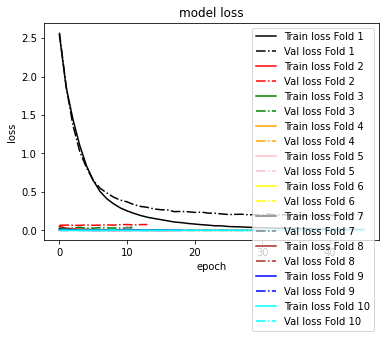

In [ ]:
plt.plot(model_history[0].history['loss'],label='Train loss Fold 1', color='black')
plt.plot(model_history[0].history['val_loss'],label='Val loss Fold 1', color='black', linestyle = "dashdot")
plt.plot(model_history[1].history['loss'], label='Train loss Fold 2', color='red')
plt.plot(model_history[1].history['val_loss'],label='Val loss Fold 2', color='red', linestyle = "dashdot")
plt.plot(model_history[2].history['loss'],label='Train loss Fold 3', color='green')
plt.plot(model_history[2].history['val_loss'],label='Val loss Fold 3', color='green', linestyle = "dashdot")
plt.plot(model_history[3].history['loss'],label='Train loss Fold 4', color='orange')
plt.plot(model_history[3].history['val_loss'],label='Val loss Fold 4', color='orange', linestyle = "dashdot")
plt.plot(model_history[4].history['loss'],label='Train loss Fold 5', color='pink')
plt.plot(model_history[4].history['val_loss'],label='Val loss Fold 5', color='pink', linestyle = "dashdot")
plt.plot(model_history[5].history['loss'],label='Train loss Fold 6', color='yellow')
plt.plot(model_history[5].history['val_loss'],label='Val loss Fold 6', color='yellow', linestyle = "dashdot")
plt.plot(model_history[6].history['loss'],label='Train loss Fold 7', color='gray')
plt.plot(model_history[6].history['val_loss'],label='Val loss Fold 7', color='gray', linestyle = "dashdot")
plt.plot(model_history[7].history['loss'],label='Train loss Fold 8', color='brown')
plt.plot(model_history[7].history['val_loss'],label='Val loss Fold 8', color='brown', linestyle = "dashdot")
plt.plot(model_history[8].history['loss'],label='Train loss Fold 9', color='blue')
plt.plot(model_history[8].history['val_loss'],label='Val loss Fold 9', color='blue', linestyle = "dashdot")
plt.plot(model_history[9].history['loss'],label='Train loss Fold 10', color='cyan')
plt.plot(model_history[9].history['val_loss'],label='Val loss Fold 10', color='cyan', linestyle = "dashdot")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.legend()
plt.show()

In [ ]:
result = model.evaluate(X_test, y_test)
print("Test accuracy:", result[1])

32/32 [==============================] - 1s 29ms/step - loss: 3.5116e-04 - accuracy: 1.0000
Test accuracy: 1.0


In [ ]:
yy_test = model.predict(X_test)

32/32 [==============================] - 2s 25ms/step


In [ ]:
yy_test=numpy.argmax(yy_test,1)

In [ ]:
val_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.metrics import confusion_matrix
#import audioUtils
cm = confusion_matrix(numpy.argmax(y_test,1),yy_test)

In [ ]:
classes= {'Al-baynat','Al-hesab','Al-raseed','Al-tahweel','Al-tamueel', 'Al-tansheet','Al-tasdeed','Arbah','Enha','Ethnan',
    'Khamsah','Laa','Naam','Sabah','Safer','Setah','Tesah','Thamanah','Thlatha','Wahed'}

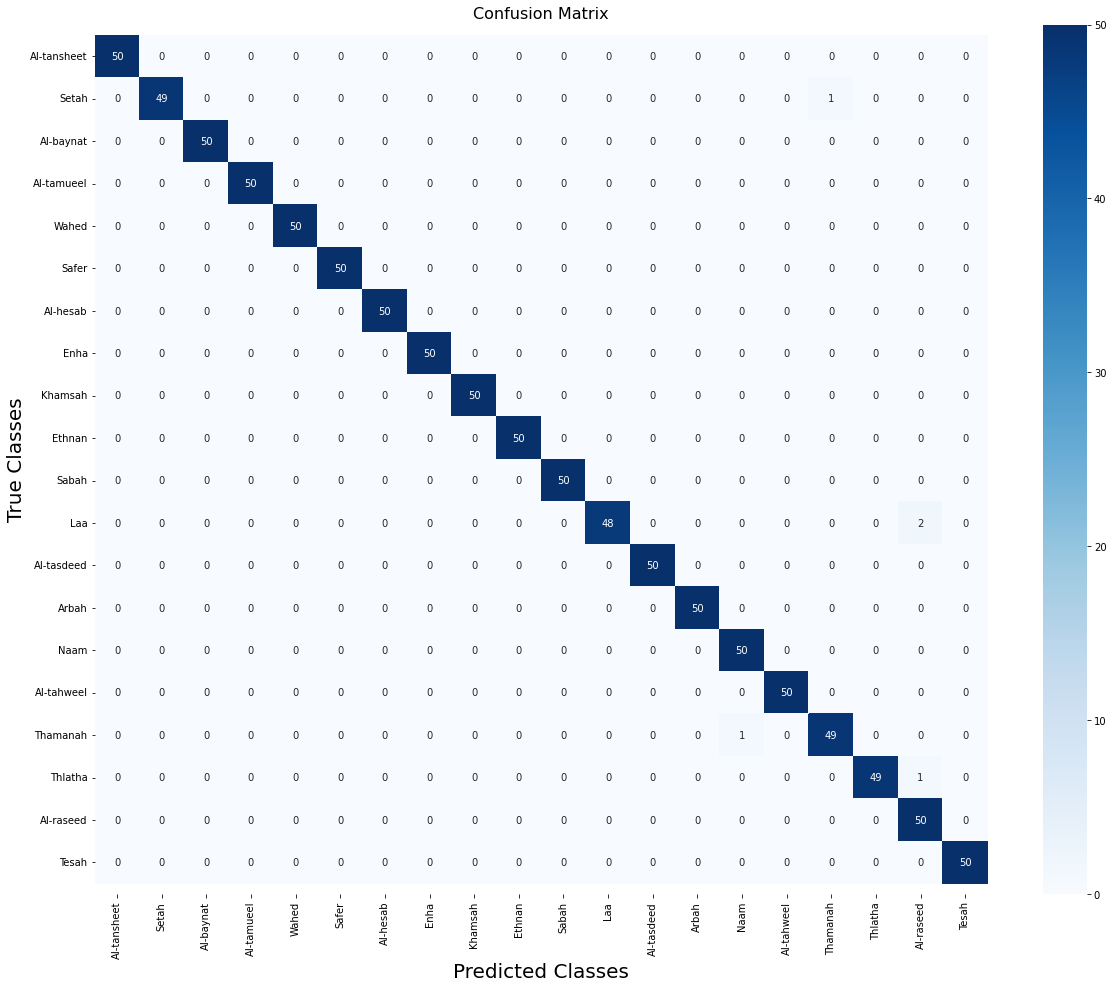

In [ ]:
import seaborn as sn
import pandas as pd
import numpy as np

df_cm = pd.DataFrame(np.array(cm), index = [i for i in classes],
                  columns = [i for i in classes])
#df_cm = someDataFrame.corr()
plt.figure(figsize = (20,16))
ax = sn.heatmap(df_cm, annot=True,fmt="d",cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.25, top - 0.25)
plt.title("Confusion Matrix", fontsize=16)
plt.ylabel("True Classes"     , fontsize=20)
plt.xlabel("Predicted Classes", fontsize=20)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test,1),yy_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        50
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        50
           8       1.00      1.00      1.00        50
           9       1.00      1.00      1.00        50
          10       1.00      1.00      1.00        50
          11       1.00      0.96      0.98        50
          12       1.00      1.00      1.00        50
          13       1.00      1.00      1.00        50
          14       0.98      1.00      0.99        50
          15       1.00      1.00      1.00        50
          16       0.98      0.98      0.98        50
          17       1.00    

In [ ]:
result = model.evaluate(new_spoken_train,one_hot_encoded_labels)

313/313 [==============================] - 8s 26ms/step - loss: 3.0778e-04 - accuracy: 1.0000


In [ ]:
y_test = model.predict(new_spoken_train)
yy_test=numpy.argmax(y_test,1)

313/313 [==============================] - 7s 24ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
#import audioUtils
cm = confusion_matrix(yy_test, numpy.argmax(one_hot_encoded_labels,1))

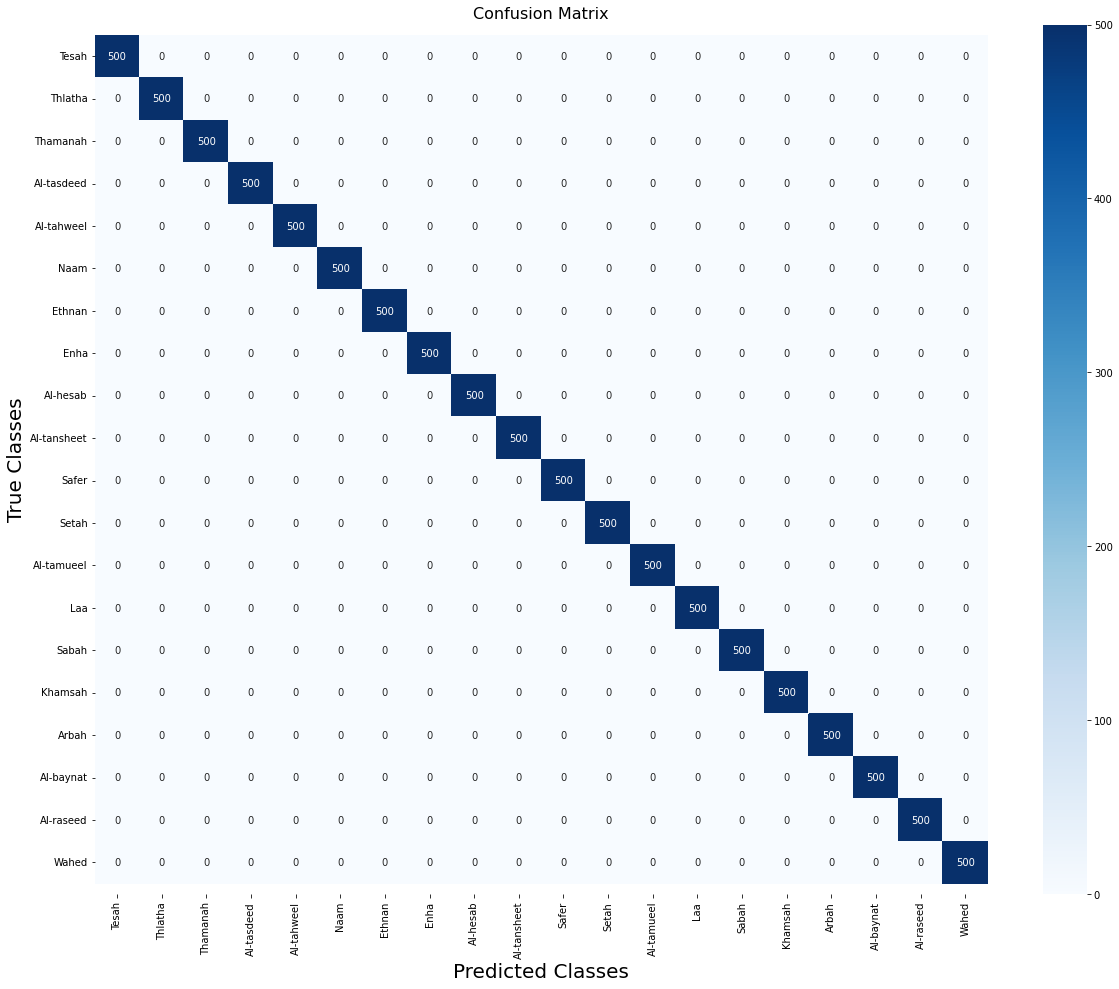

In [ ]:
import seaborn as sn
import pandas as pd
import numpy as np

df_cm = pd.DataFrame(np.array(cm), index = [i for i in classes],
                  columns = [i for i in classes])
#df_cm = someDataFrame.corr()
plt.figure(figsize = (20,16))
ax = sn.heatmap(df_cm, annot=True,fmt="d",cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.25, top - 0.25)
plt.title("Confusion Matrix", fontsize=16)
plt.ylabel("True Classes"     , fontsize=20)
plt.xlabel("Predicted Classes", fontsize=20)
plt.show()

In [ ]:
print(classification_report(yy_test,np.argmax(one_hot_encoded_labels,1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       500
           3       1.00      1.00      1.00       500
           4       1.00      1.00      1.00       500
           5       1.00      1.00      1.00       500
           6       1.00      1.00      1.00       500
           7       1.00      1.00      1.00       500
           8       1.00      1.00      1.00       500
           9       1.00      1.00      1.00       500
          10       1.00      1.00      1.00       500
          11       1.00      1.00      1.00       500
          12       1.00      1.00      1.00       500
          13       1.00      1.00      1.00       500
          14       1.00      1.00      1.00       500
          15       1.00      1.00      1.00       500
          16       1.00      1.00      1.00       500
          17       1.00    

In [ ]:
model_history[0].history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
classes= ['Al-baynat','Al-hesab','Al-raseed','Al-tahweel','Al-tamueel', 'Al-tansheet','Al-tasdeed','Arbah','Enha','Ethnan',
    'Khamsah','Laa','Naam','Sabah','Safer','Setah','Tesah','Thamanah','Thlatha','Wahed']

In [ ]:
# Read your own data, some times may not function in colab. You have to convert byte to float before prediction
from io import BytesIO
from base64 import b64decode
from google.colab import output
from IPython.display import Javascript

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  print("")
  print("Speak Now...")
  display(Javascript(RECORD))
  sec += 1
  s = output.eval_js('record(%d)' % (sec*1000))
  print("Done Recording !")
  b = b64decode(s.split(',')[1])
  return b #byte stream

In [ ]:
audio = record(1)


Speak Now...


<IPython.core.display.Javascript object>

Done Recording !


In [ ]:
# this code for jupyter notebook, but not functions in colab
import sounddevice as sd
import soundfile as sf

samplerate = 16000
duration = 2 # seconds
filename = 'record_file.wav'
print("start")
mydata = sd.rec(int(samplerate * duration), samplerate=samplerate,
    channels=1, blocking=True)
print("end")
sd.wait()
sf.write(filename, mydata, samplerate)

In [ ]:
import IPython.display as ipd
samples, sample_rate = librosa.load(filelist[556],sr=44100)
#samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=44100)

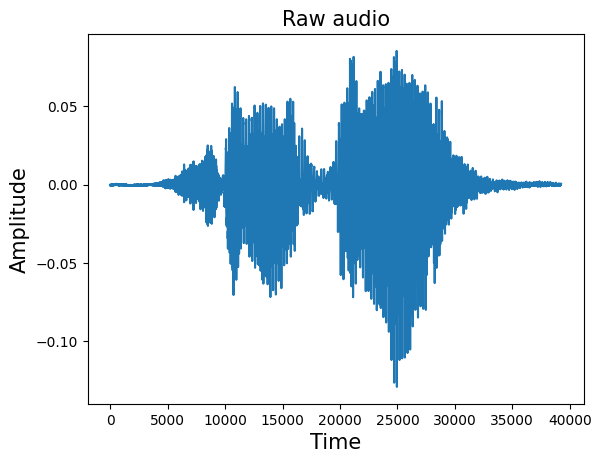

In [ ]:
import matplotlib.pyplot as plt
import librosa
#samples, sample_rate = librosa.load(filename, sr = 16000)
plt.plot(samples)
plt.title('Raw audio', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.xlabel('Time', fontsize=15)
import numpy as np
input_audio=np.array(samples).reshape(1,len(samples))
import IPython.display as ipd
ipd.Audio(input_audio,rate=44100)

In [ ]:
#filename='drive/MyDrive/Colab Notebooks/S04.09.14.wav'
# We are checking whether properly recognize or not for your own data. Here arbitrary sample is tested
filename=filelist[556]
#sig = record(1)
#sig=struct.unpack('f',sig)
rate=44100
(rate,sig) = wav.read(filename)
print(filename)
#print(labels[700])
mfcc_feat = mfcc(sig,rate, numcep=18, nfft=2048)
difference = 371-mfcc_feat.shape[0]
#difference
zero_padded = np.pad(mfcc_feat,((0,difference),(0,0)), "constant")
#zero_padded =zero_padded.reshape(1,371,18)
#zero_padded.shape
zero_padded =zero_padded.reshape(1,371,18)


/drive/MyDrive/test/Arabicdataset/Sabah/S46.09.08.wav


In [ ]:
pred = model.predict(zero_padded, verbose=1)
index=np.argmax(pred)
#print(classes1[index])
print(classes[index])
index

1/1 [==============================] - 0s 33ms/step
Sabah


13